In [18]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd

In [143]:
# def read_dataset(filePath,delimiter=','):
#     return genfromtxt(filePath, delimiter=delimiter)

In [144]:
train_data = read_dataset('vibmon.csv')

In [145]:
df = pd.read_csv('vibmon.csv')
df.head()

,SensorName,LastCommunicationDate,X_mms,Y_mms,Z_mms,X_hz,Y_hz,Z_hz,Fault
0,Sensor-300578,08-08-2017 08:14,20.0,20.4,16.7,14,12,17,0
1,Sensor-300577,08-08-2017 08:17,25.0,24.3,10.8,15,11,19,0
2,Sensor-300575,08-08-2017 08:18,9.6,2.5,3.2,11,10,13,0
3,Sensor-300579,08-08-2017 08:18,15.1,2.1,1.5,12,9,12,0
4,Sensor-300578,08-08-2017 08:24,13.1,12.2,0.1,10,13,22,0


In [146]:
train_data = df.drop(['Fault', 'SensorName', 'LastCommunicationDate'], axis=1)
train_data.head()

,X_mms,Y_mms,Z_mms,X_hz,Y_hz,Z_hz
0,20.0,20.4,16.7,14,12,17
1,25.0,24.3,10.8,15,11,19
2,9.6,2.5,3.2,11,10,13
3,15.1,2.1,1.5,12,9,12
4,13.1,12.2,0.1,10,13,22


In [49]:
clf = svm.OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
clf.fit(train_data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.05, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [50]:
pred = clf.predict(train_data)

# inliers are labeled 1, outliers are labeled -1
normal = train_data[pred == 1]
abnormal = train_data[pred == -1]

In [56]:
# plt.figure()
# plt.plot(normal[:,0],normal[:,1],'bx')
# plt.plot(abnormal[:,0],abnormal[:,1],'ro')
# plt.xlabel('Latency (ms)')
# plt.ylabel('Throughput (mb/s)')
# plt.show()
# normal
# abnormal

In [57]:
%pylab inline

# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


C:\Users\sushil.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf', 'normal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


fig = plt.figure()
ax = plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

ax.scatter(x, y, z, c=c)

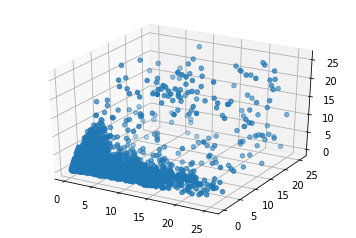

In [133]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z = train_data.iloc[:,2:3]
x = train_data.iloc[:,0:1]
y = train_data.iloc[:,1:2]

c = x + y

ax.scatter(x, y, z, '-b')
# ax.plot_surface(x, y, z)

# ax.plot(x, y, z, '-b')

In [140]:
# plt.figure()
# a = [1,2,5,6,9,11,15,17,18]
# plt.hlines(1,1,20)  # Draw a horizontal line
# plt.eventplot(x, orientation='horizontal', colors='b')
# plt.axis('off')
# plt.show()
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.plot(x, y, z, '-b')

In [141]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

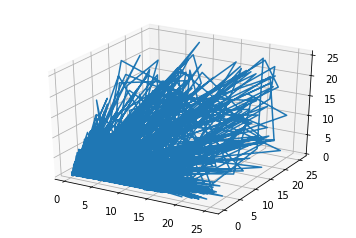

In [122]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(x, y, z)

In [121]:
# ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(0, 15, 1000)
# xline = np.sin(zline)
# yline = np.cos(zline)
# ax.plot3D(x.values.flatten, y.values.flatten, z.values.flatten, 'gray')
# ax.plot_trisurf(x.values.flatten, y.values.flatten, z.values.flatten,linewidth=0.2)
# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# ax.scatter3D(x, y, z,  cmap='Greens');
# z.shape

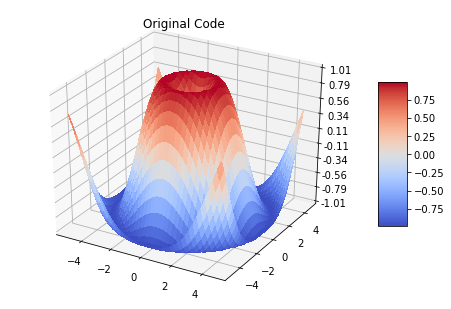

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

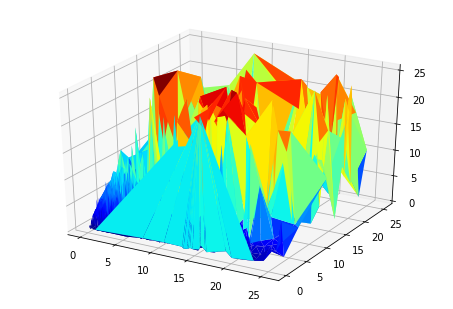

In [136]:
## DataFrame from 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
df = pd.DataFrame({'x': x, 'y': y, 'z': z}, index=range(len(x)))

# Plot using `.trisurf()`:
fig = plt.figure()
ax = Axes3D(fig)
# ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
ax.plot_trisurf(train_data.X_mms, train_data.Y_mms, train_data.Z_mms, cmap=cm.jet, linewidth=0.2)

plt.show()


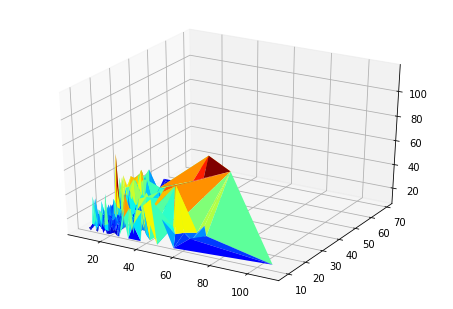

In [138]:
## DataFrame from 2D-arrays
x = X.reshape(1600)
y = Y.reshape(1600)
z = Z.reshape(1600)
df = pd.DataFrame({'x': x, 'y': y, 'z': z}, index=range(len(x)))

# Plot using `.trisurf()`:
fig = plt.figure()
ax = Axes3D(fig)
# ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
ax.plot_trisurf(train_data.X_hz, train_data.Y_hz, train_data.Z_hz, cmap=cm.jet, linewidth=0.2)

plt.show()

In [137]:
train_data.head()

,X_mms,Y_mms,Z_mms,X_hz,Y_hz,Z_hz
0,20.0,20.4,16.7,14,12,17
1,25.0,24.3,10.8,15,11,19
2,9.6,2.5,3.2,11,10,13
3,15.1,2.1,1.5,12,9,12
4,13.1,12.2,0.1,10,13,22
